# Max Speed vs. Fatality Rate - Cyrus
# ---------------- Start ----------------

In [53]:
# dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
max_spd_path = "data_raw/max_speed_limits_by_country.csv"
death_by_type_path = "data_raw/deaths_by_vehicle_type.csv"
tot_death_by_cty_path = "data_raw/total_deaths_by_country.csv"

# read the mouse data and the death by type rate
# add header = 1 to remove the extra row in the CSV file
max_spd = pd.read_csv(max_spd_path, header=1)

# header contains "Distribution of road traffic deaths by type of road user (%)"
death_by_typ = pd.read_csv(death_by_type_path, header=1,)

# header contains "Estimated number of road traffic deaths" & "Estimated road traffic death rate (per 100 000 population)
tot_death_by_cty = pd.read_csv(tot_death_by_cty_path, header=1,)


In [88]:
# combine the data into a single dataset
combined_data = pd.merge(max_spd, tot_death_by_cty,on=["Country"], how = "inner")

# remove the extra space in front of the columns
combined_data = combined_data.rename(columns = {" Urban":"Urban Max Speed",
                                                " Rural":"Rural Max Speed", 
                                                " 2016":"Est. no. of road traffic deaths",
                                                " 2016.1":"Est. road traffic death rate (per 100 000 population)",
                                                })

## for column "Urban Max Speed" and "Rural Max Speed" 
# drop all rows containing "?" or "No"
combined_data = combined_data[~combined_data['Rural Max Speed'].isin(['?',"No","No "])]
combined_data = combined_data[~combined_data['Urban Max Speed'].isin(['?',"No","No "])]
# as the max speed column contains a range of numbers, this is to capture the last number in the cell
combined_data["Rural Max Speed"] = combined_data["Rural Max Speed"].str.split().str[-1]
combined_data["Urban Max Speed"] = combined_data["Urban Max Speed"].str.split().str[-1]
# convert data type from string to integer
combined_data['Rural Max Speed'] = combined_data['Rural Max Speed'].astype(int)
combined_data['Urban Max Speed'] = combined_data['Urban Max Speed'].astype(int)

## for column "Est. no. of road traffic deaths"
# remove all spaces within the column 
combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].str.replace(" ","")
# extract the numbers before the character "[" 
combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].str.split('[').str[0]
# convert data type from string to integer
combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].astype(int)

# display the data table for preview
combined_data.head()

,Country,Year,Urban Max Speed,Rural Max Speed,Est. no. of road traffic deaths,Est. road traffic death rate (per 100 000 population)
0,Afghanistan,2017,90,90,5230,15.1
1,Albania,2017,40,80,399,13.6
2,Angola,2017,60,90,6797,23.6
3,Antigua and Barbuda,2017,32,64,8,7.9
4,Argentina,2017,60,110,6119,14.0


# For me, only 12 countries couldn't show the correlation between speed limit and death rate
I've included the code in case if we need to sort the country

In [89]:
# # list the required contries for easier editting
# countries = ["Australia",
#              "United States of America",
#              "United Kingdom of Great Britain and Northern Ireland",
#              "Spain",
#              "Sweden",
#              "Germany",
#              "Israel",
#              "Canada",
#              "Argentina",
#              "Belgium",
#              "Finland",
#              "Greece",]

# # select the required countries
# combined_data = combined_data[combined_data["Country"].isin(countries)]

# # display the data table for preview
# combined_data.head()

The r-squared is: 0.010846508331365303


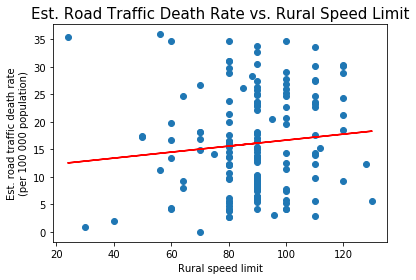

In [90]:
# platting the graph for Est. Road Traffic Death Rate vs. Rural Speed Limit
x_values = combined_data['Rural Max Speed']
y_values = combined_data['Est. road traffic death rate (per 100 000 population)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rural speed limit')
plt.ylabel('Est. road traffic death rate\n(per 100 000 population)')
plt.title("Est. Road Traffic Death Rate vs. Rural Speed Limit",fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.025457184901865045


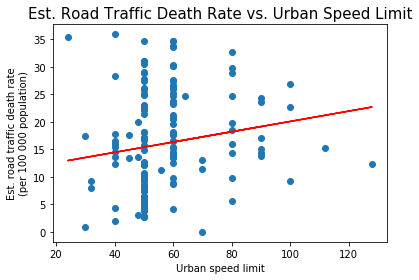

In [86]:
# platting the graph for Est. Road Traffic Death Rate vs. Urban Speed Limit
x_values = combined_data['Urban Max Speed']
y_values = combined_data['Est. road traffic death rate (per 100 000 population)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Urban speed limit')
plt.ylabel('Est. road traffic death rate\n(per 100 000 population)')
plt.title("Est. Road Traffic Death Rate vs. Urban Speed Limit",fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.show()

# ---------------- End ----------------
# Max Speed vs. Fatality Rate - Cyrus